# Шлокова Анна 17 вариант

In [152]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
c2, A, B, C = (0.9, 1, -3, 2)


# Пункт 1


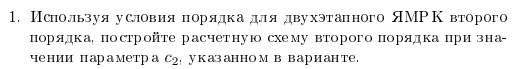

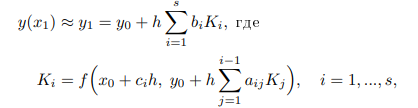

In [154]:
def RK_two_step(f, x0, y0, h):
    # a21 = c2
    b2 = 1 / (2 * c2)
    b1 = 1 - b2
    k1 = f(x0, y0)
    k2 = f(x0 + c2 * h, y0 + h * c2 * k1)

    return y0 + h * (b1 * k1 + b2 * k2)

# Пункт 2

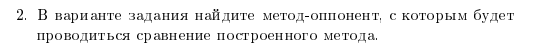

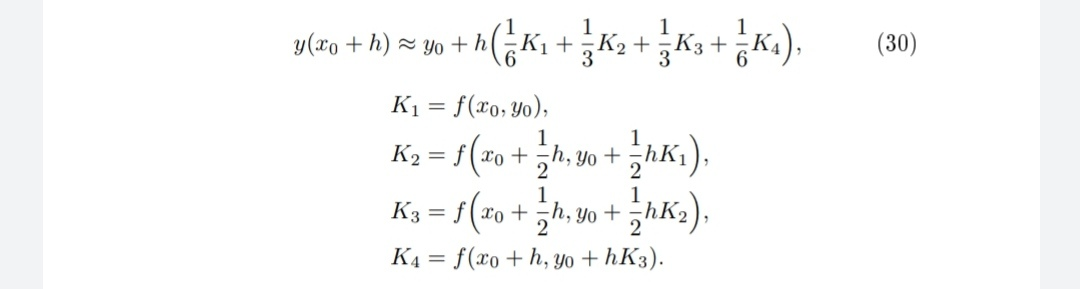

In [155]:
def RK_four_step(f, x0, y0, h):
    k1 = f(x0, y0)
    k2 = f(x0 + 1 / 2 * h, y0 + 1 / 2 * h * k1)

    k3 = f(x0 + 1 / 2 * h, y0 + 1 / 2 * h * k2)

    k4 = f(x0 + h, y0 + h * k3)

    return y0 + h * (1 / 6 * k1 + 1 / 3 * k2 + 1 / 3 * k3 + 1 / 6 * k4)



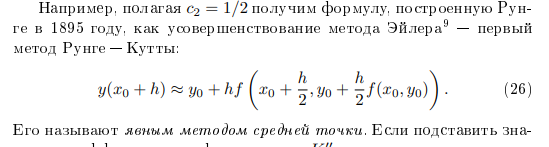

In [156]:
def average_point_step(f, x0, y0, h):
    return y0 + h * f(x0 + h / 2, y0 + h / 2 * f(x0, y0))


# Пункт 3

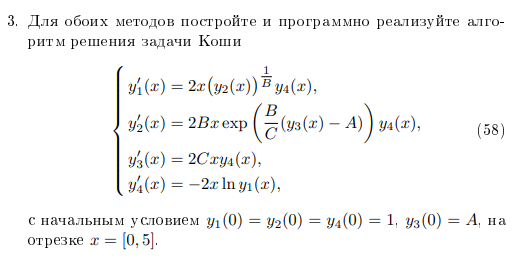

In [157]:
params = {'x0': 0,
          'xn': 5,
          'y0': np.array([1, 1, A, 1]),
          'n': 400}

In [199]:
def f(x, y):
    return np.array([2 * x * np.power(y[1], 1/B) * y[3],
                     2 * B * x * np.exp(B / C * (y[2] - A)) * y[3],
                     2 * C * x * y[3],
                     -2 * x * np.log(y[0])
                     ])


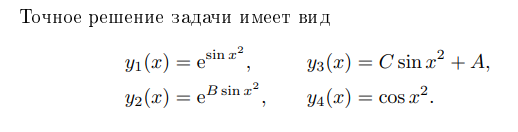

In [200]:
def exact_ans(x):
    return np.array([np.exp(np.sin(x**2)),
                     np.exp(B * np.sin(x**2)),
                     C * np.sin(x**2) + A,
                     np.cos(x**2)])

In [201]:
def ode(method, f, x0, y0, xn, h=None, n=None):
    if h == None:
        h = (xn - x0) / n
    else:
        n = int((xn - x0) // h)

    x, y = [x0, ], [y0]

    for i in range(n):
        y_new = method(f, x[-1], y[-1], h)
        x_new = x[-1] + h
        x.append(x_new)
        y.append(y_new)
    return np.array(x), np.array(y)

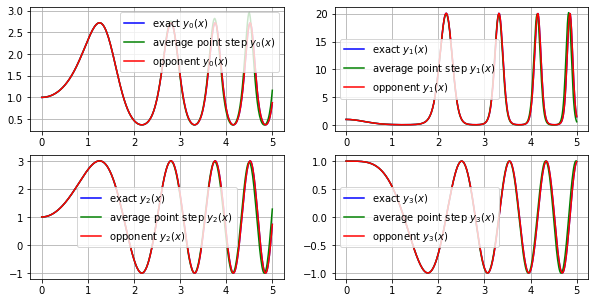

In [202]:
RK_X, RK_Y = ode(average_point_step, f, **params)
opponent_X, opponent_Y = ode(RK_four_step, f, **params)
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(RK_X, exact_ans(RK_X)[i], 'b', label=f'exact $y_{i}(x)$')
    plt.plot(RK_X, RK_Y[:,i], 'g', label=f'average point step $y_{i}(x)$')
    plt.plot(opponent_X, opponent_Y[:,i], 'r', label=f'opponent $y_{i}(x)$')
    plt.legend()
    plt.grid()
plt.show()


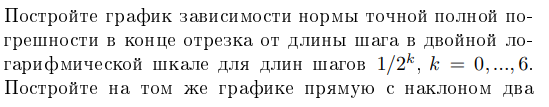

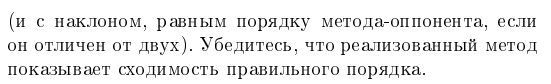

In [203]:
def norms_k(method):
    K = range(7, 13) 
    norms = []
    for k in K:
        x0, y0, xn = params['x0'], params['y0'], params['xn']
        method_x, method_y = ode(method, f, x0, y0, xn, 1/2**k)
        er = np.linalg.norm(exact_ans(method_x[-1]) - method_y[-1])
        norms.append(-np.log10(er))
        # print(f"n: {k} norm: {norms[-1]} err: {er}")
    return norms



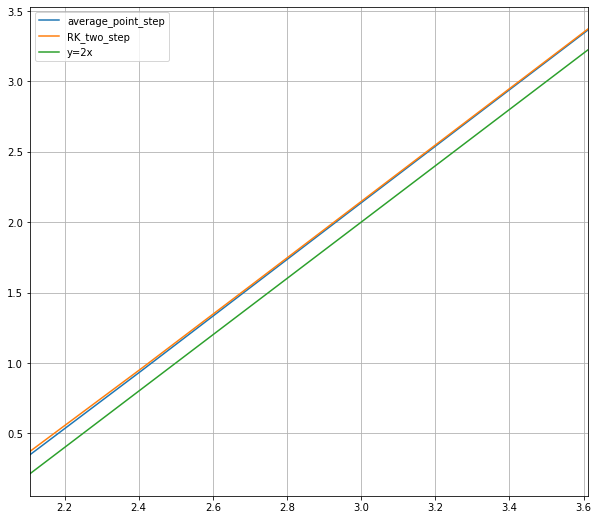

In [204]:
log_K = -np.log10(np.array([1/2**k for k in range(7, 13)])) 
min_x, max_x = min(log_K), max(log_K)
x_lin = np.linspace(min_x, max_x, 10)

plt.figure(1, figsize=(10, 9))

plt.plot(log_K, norms_k(average_point_step), label='average_point_step')
plt.plot(log_K, norms_k(RK_two_step), label='RK_two_step')
plt.plot(x_lin, 2*x_lin-4, label='y=2x')
plt.xlim(min_x, max_x)

plt.legend()
plt.grid()
plt.show()


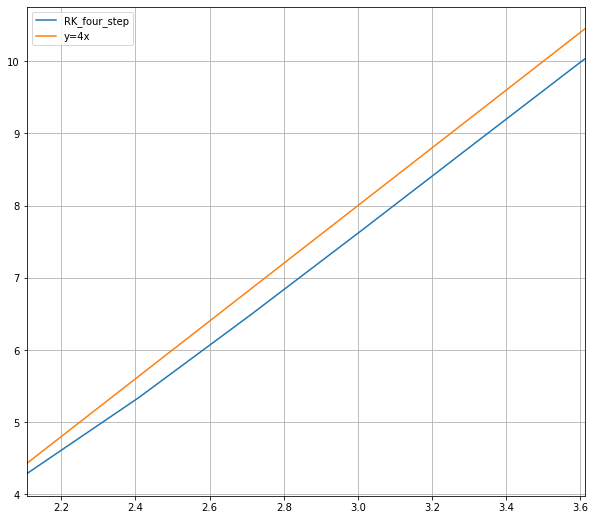

In [205]:
plt.figure(1, figsize=(10, 9))

plt.plot(log_K, norms_k(RK_four_step), label='RK_four_step')
plt.plot(x_lin, 4*x_lin-4, label='y=4x')
plt.xlim(min_x, max_x)

plt.legend()
plt.grid()
plt.show()

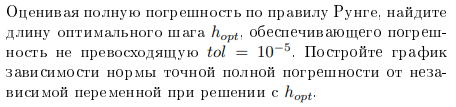

In [206]:
def get_h_opt(h, y_n, y_2n, tol=1e-5, p=2):
    r_n = (y_2n - y_n) / (1 - 2 ** (-p))
    return h * np.power(tol / np.linalg.norm(r_n), 1 / p)

In [207]:
def ode_h_opt(method, f, x0, y0, xn,n, p, tol=1e-5, h_init= 1 / (2 ** 6)):
    _, yh = ode(method, f, x0, y0, xn, h=h_init)
    _, yh2 = ode(method, f, x0, y0, xn, h=h_init / 2)
    h_opt = get_h_opt(h_init, yh[-1], yh2[-1], tol, p)

    n = int((xn - x0) // h_opt)
 
    x, y = [x0], [y0]

    for i in range(n):
        y_new = method(f, x[-1], y[-1], h_opt)
        x_new = x[-1] + h_opt
        x.append(x_new)
        y.append(y_new)

    return np.array(x), np.array(y), h_opt

In [208]:
h_init = 1/(2**7)
x_opt, y_opt, h_opt = ode_h_opt(RK_four_step, f, p=2, tol=1e-6, h_init=h_init, **params)
f"h_init: {h_init}", f"h_opt: {h_opt}"

('h_init: 0.0078125', 'h_opt: 0.0009856816990650183')

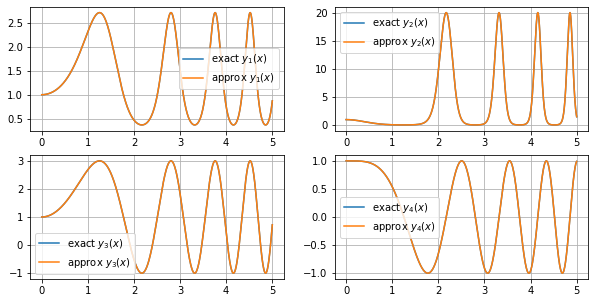

In [209]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(x_opt, exact_ans(x_opt)[i], label='exact $y_{%s}(x)$' % (i+1))
    plt.plot(x_opt, y_opt[:,i], label='approx $y_{%s}(x)$' % (i+1))
    plt.legend()
    plt.grid()
plt.show()

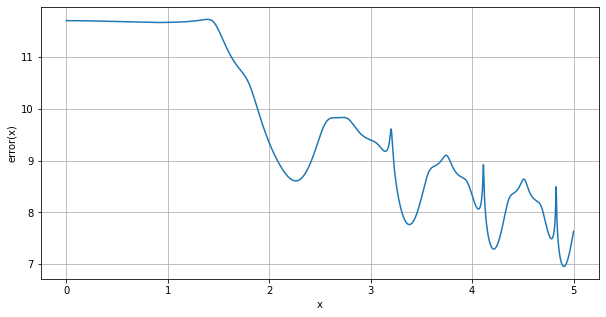

In [210]:
err = exact_ans(x_opt).T - y_opt + 1e-12 
err = -np.log10(np.sum(err**2, axis=1)**0.5)

plt.figure(figsize=(10, 5))
plt.plot(x_opt, err)
plt.xlabel('x')
plt.ylabel('error(x)')
plt.grid()
plt.show()


# Пункт 4

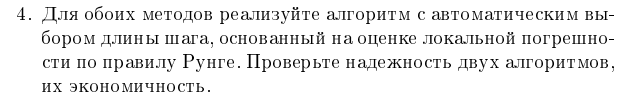

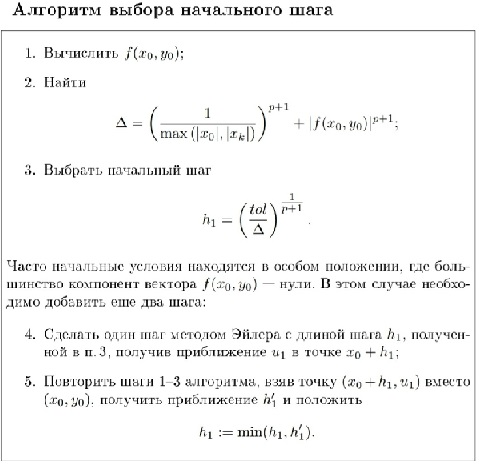

In [230]:
def get_init_step(p, tol, f, x0, y0, x_end):
    delta1 = np.power(1 / max(np.abs(x0), np.abs(x_end)), p + 1) + np.linalg.norm(f(x0, y0)) ** (p + 1)

    h1 = np.power(tol / delta1, 1 / (p + 1))
    u1 = average_point_step(f, x0, y0, h1)

    delta2 = np.power(1 / max(np.abs(x0 + h1), np.abs(x_end)), p + 1) + np.linalg.norm(f(x0 + h1, u1)) ** (p + 1)

    h2 = np.power(tol / delta2, 1 / (p + 1))

    return min(h1, h2)

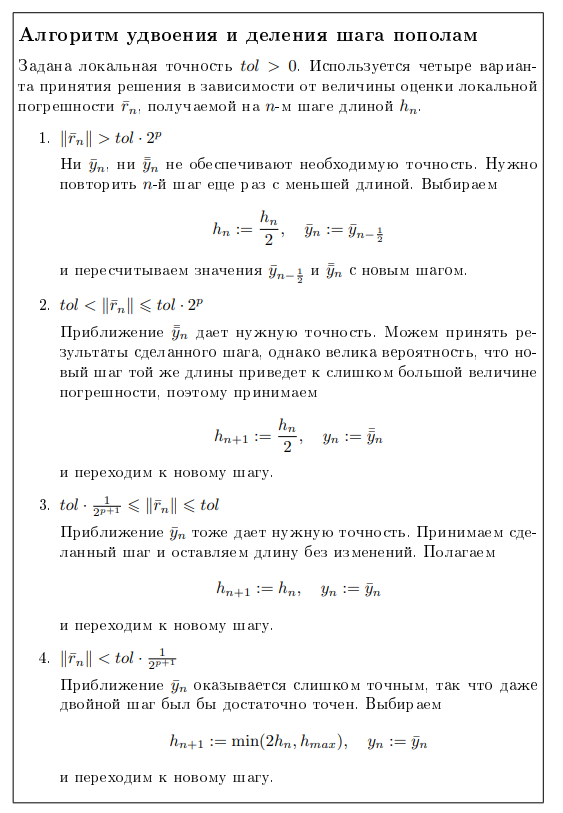


In [242]:
def ode_optimal(method, f, x0, y0, xn, n, p, rtol, atol):
    tol = rtol * np.linalg.norm(y0) + atol
    h = get_init_step(p, tol, f, x0, y0, xn)
    h_arr, x, y =[h], [x0], [y0]

    y_old = method(f, x0, y0, h)
    y_mid = method(f, x0, y0, h / 2)
    y_new = method(f, x0 + h / 2, y_mid, h / 2)

    err_old = (y_new - y_old) / (1 - 2 ** (-p))
    err_new = (y_new - y_old) / ((2 ** p) - 1)

    h_cur = h
    h_next = h
    h_max = h_cur

    while x[-1] < xn:
        if np.linalg.norm(err_old) > tol * 2 ** p:
            h_cur /= 2

            y_old = y_mid
            y_mid = method(f, x[-1], y[-1], h_cur / 2)
            y_new = method(f, x[-1] + h_cur / 2, y_mid, h_cur / 2)

            err_old = (y_new - y_old) / (1 - 2 ** (-p))
            err_new = (y_new - y_old) / ((2 ** p) - 1)

            continue

        elif tol < np.linalg.norm(err_old) <= tol * 2 ** p:
            h_next = h_cur / 2 
            x.append(x[-1] + h_cur)
            y.append(y_new + err_new)

            h_max = max(h_max, h_cur)

        elif tol * (2 ** (-p - 1)) <= np.linalg.norm(err_old) <= tol:
            h_next = h_cur
            
            x.append(x[-1] + h_cur)
            y.append(y_old + err_old)

            h_max = max(h_max, h_cur)

        elif np.linalg.norm(err_old) < tol * (2 ** (-p - 1)):
            h_next = min(2 * h_cur, h_max)
             
            x.append(x[-1] + h_cur)
            y.append(y_old + err_old)

            h_max = max(h_max, h_cur)

        h_cur = h_next
        h_arr.append(h_cur)  
        y_old = method(f, x[-1], y[-1], h_cur)
        y_mid = method(f, x[-1], y[-1], h_cur / 2)
        y_new = method(f, x[-1] + h_cur / 2, y_mid, h_cur / 2)

        err_old = (y_new - y_old) / (1 - 2 ** (-p))
        err_new = (y_new - y_old) / ((2 ** p) - 1)
        tol = rtol * np.linalg.norm(y[-1]) + atol

    return np.array(h_arr), np.array(x), np.array(y)


In [243]:
def plot_norms_optimal(method, rtol, atol, p):
    h_opt, x_opt, y_opt = ode_optimal(method, f, p=p, rtol=rtol, atol=atol, **params)
    plt.figure(figsize=(10, 5))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.plot(x_opt, exact_ans(x_opt)[i], label=f'exact $y_{i}(x)$')
        plt.plot(x_opt, y_opt[:, i], label=f'approx $y_{i}(x)$')
        plt.legend()
        plt.grid()
    plt.show()

    er = exact_ans(x_opt).T - y_opt + 1e-12
    er = -np.log10(np.sum(er ** 2, axis=1) ** 0.5)

    plt.figure(figsize=(10, 5))
    plt.plot(x_opt, er)
    plt.xlabel('x')
    plt.ylabel('error(x)')
    plt.grid()
    plt.show()
    return h_opt, x_opt



0.026256602910861022


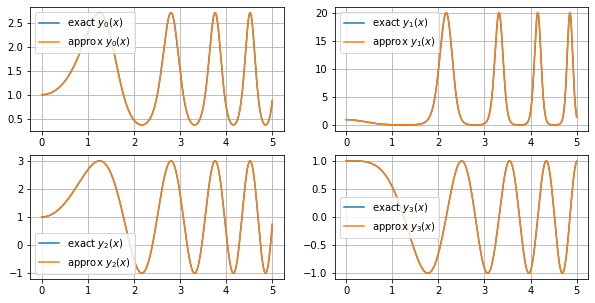

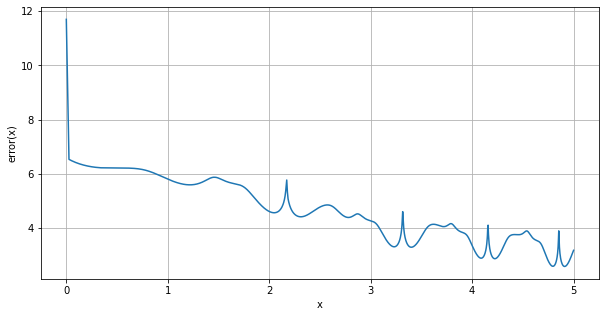

In [244]:
h_opt, x_opt = plot_norms_optimal(RK_two_step, 1e-6, 1e-12, 2)


0.032436444627737586


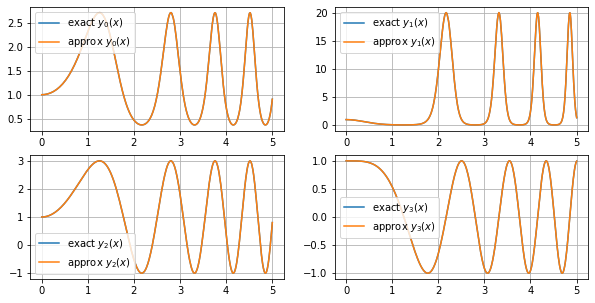

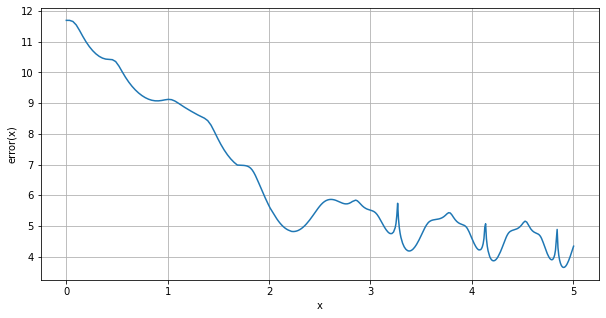

In [245]:
h_opt1, x_opt1 = plot_norms_optimal(RK_four_step, 1e-6, 1e-12, 4)

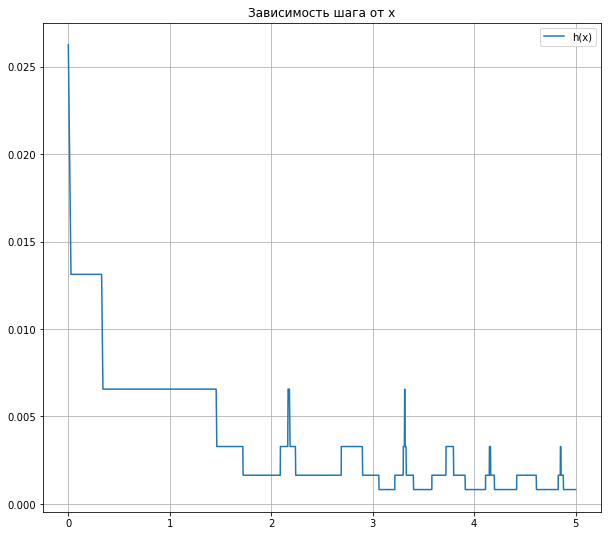

In [246]:

plt.figure(1,figsize=(10,9))
plt.title('Зависимость шага от x')

plt.plot( x_opt,h_opt, label='h(x)')

plt.legend()
plt.grid()
plt.show()